In [1]:
# Import the google drive folders that contain the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/DSC680/Weeks1-4/Week2/data/

/content/drive/MyDrive/DSC680/Weeks1-4/Week2/data


In [3]:
%ls

aggression_parsed_dataset.csv/          glove.6B.50d.txt
antidepressant/                         glove.6B.zip
antidepressants/                        hopeless/
archive/                                kaggle_parsed_dataset.csv/
attack_parsed_dataset.csv/              lonely/
cyberbullying_tweets.csv                suicide/
depressed/                              toxicity_parsed_dataset.csv/
depression/                             twitter_parsed_dataset.csv/
depression_dataset_reddit_cleaned.csv/  twitter_racism_parsed_dataset.csv/
depressive_unigram_tweets_final.csv     twitter_sexism_parsed_dataset.csv/
glove.6B.100d.txt                       vader_processed_final.csv
glove.6B.200d.txt                       youtube_parsed_dataset.csv/
glove.6B.300d.txt


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import functools, re
import random
import re
from sklearn.feature_extraction.text import CountVectorizer

import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import matplotlib.pyplot as plt
import seaborn as sns

import re
import collections

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv("cyberbullying_tweets.csv")
df

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
df.describe()

tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998

In [8]:
all_labels = df['cyberbullying_type'].unique()
all_labels

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

<Axes: >

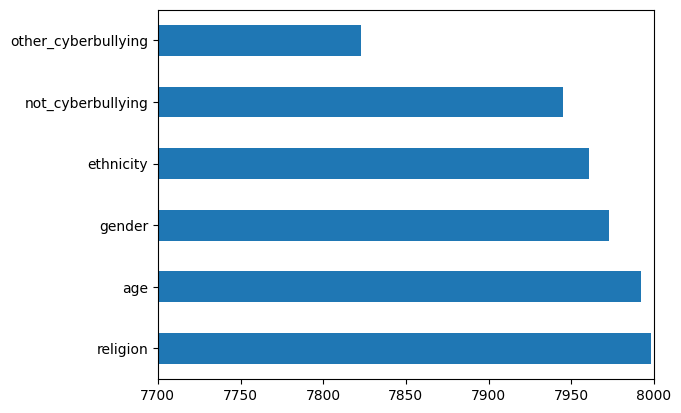

In [9]:
df.cyberbullying_type.value_counts().plot.barh(xlim=(7700,8000))

In [10]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

In [11]:
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

df['tweet_text']=df['tweet_text'].apply(lambda text: lemmatizer_words(text))
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

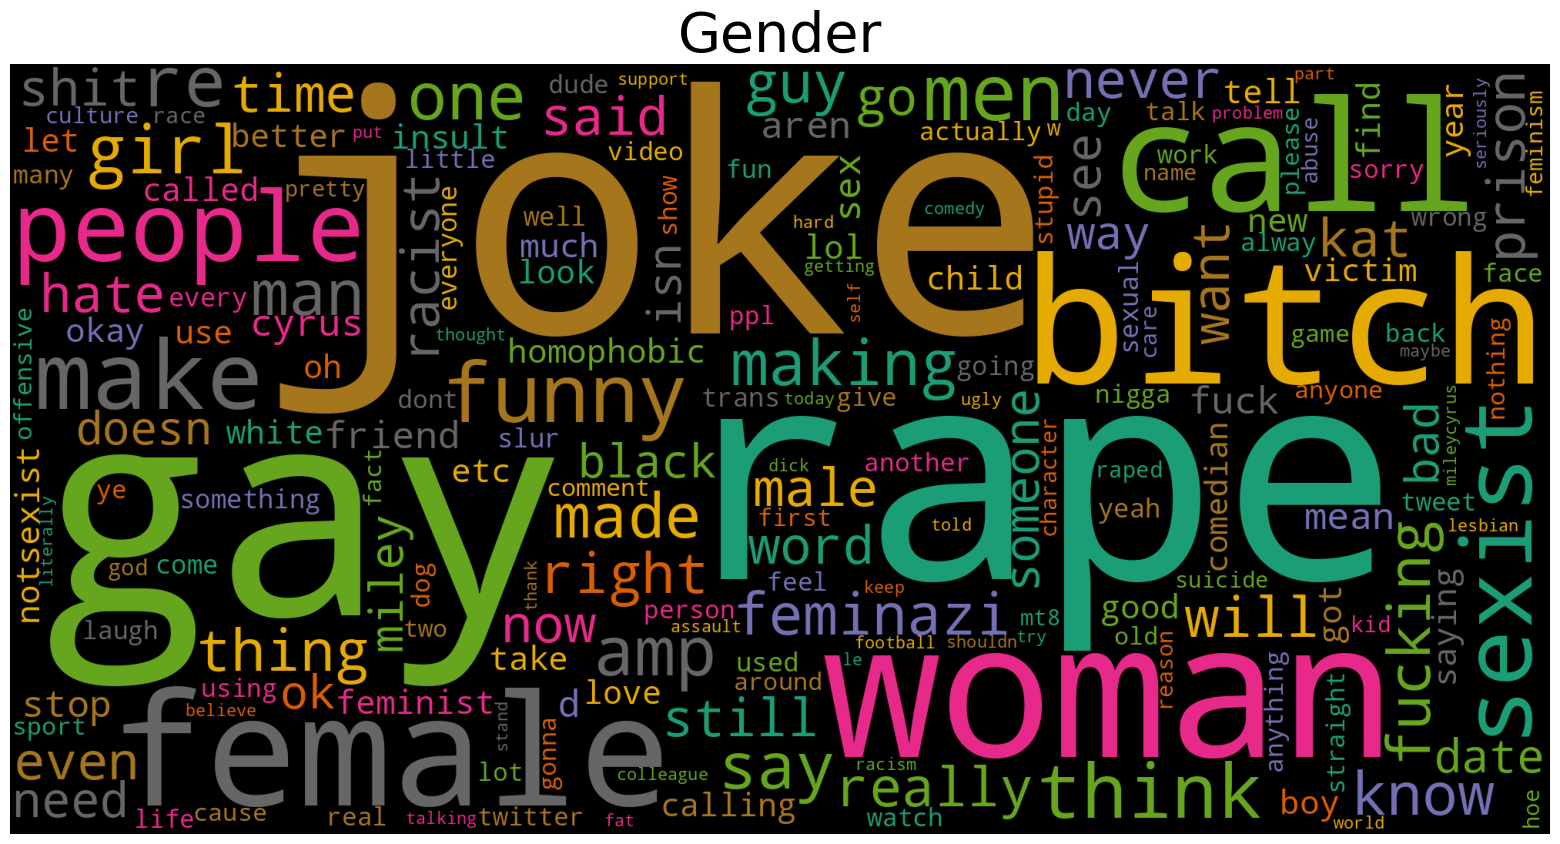

In [14]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

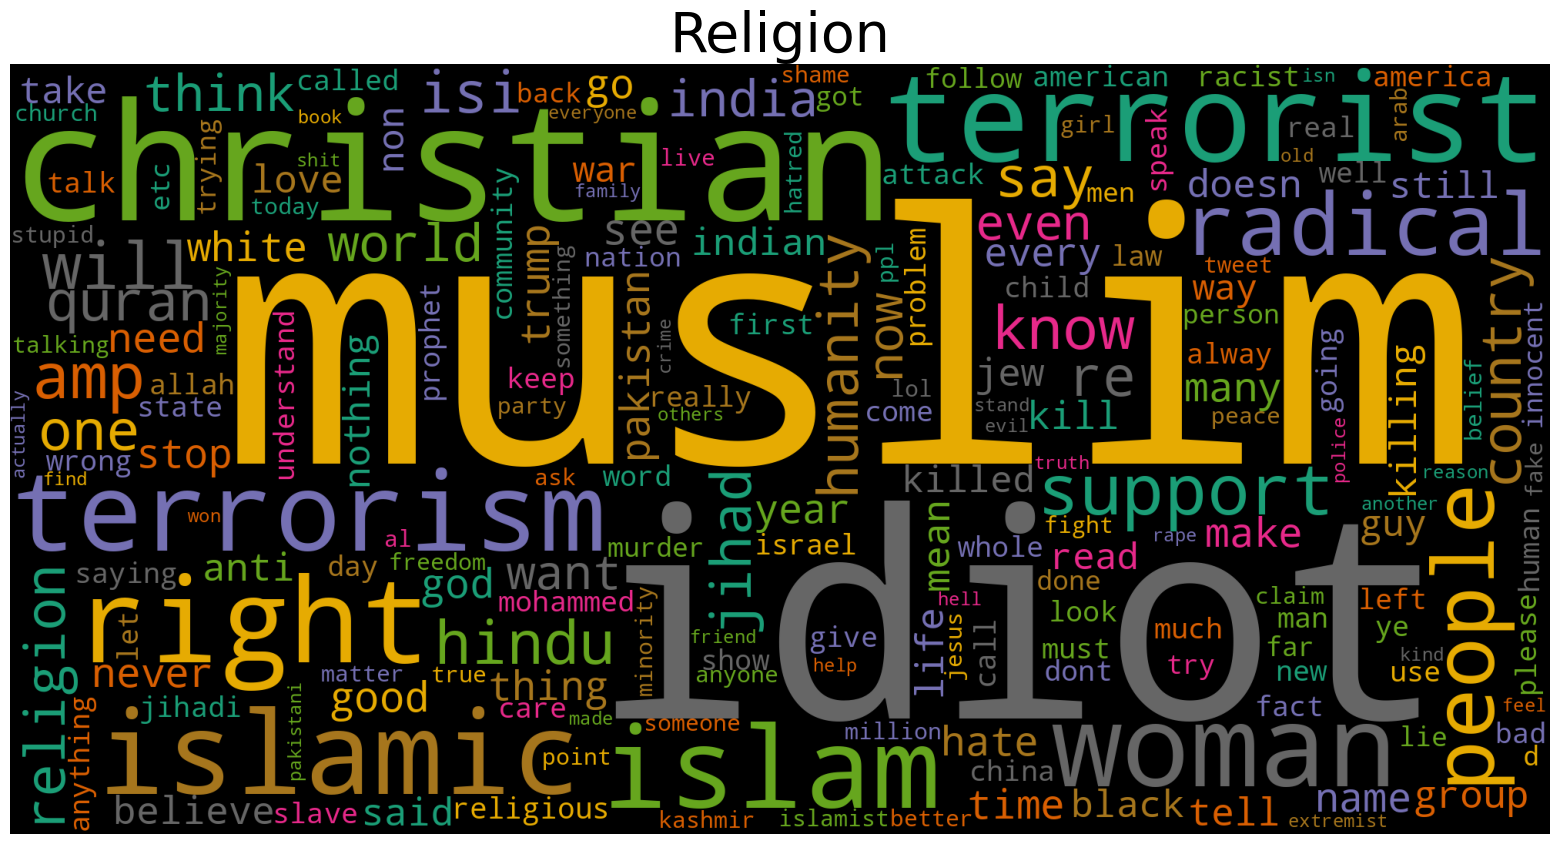

In [15]:
plt.figure(figsize=(20,10))
subset2 = df[df['cyberbullying_type']=='religion']
text_religion = subset2.tweet_text.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud2)

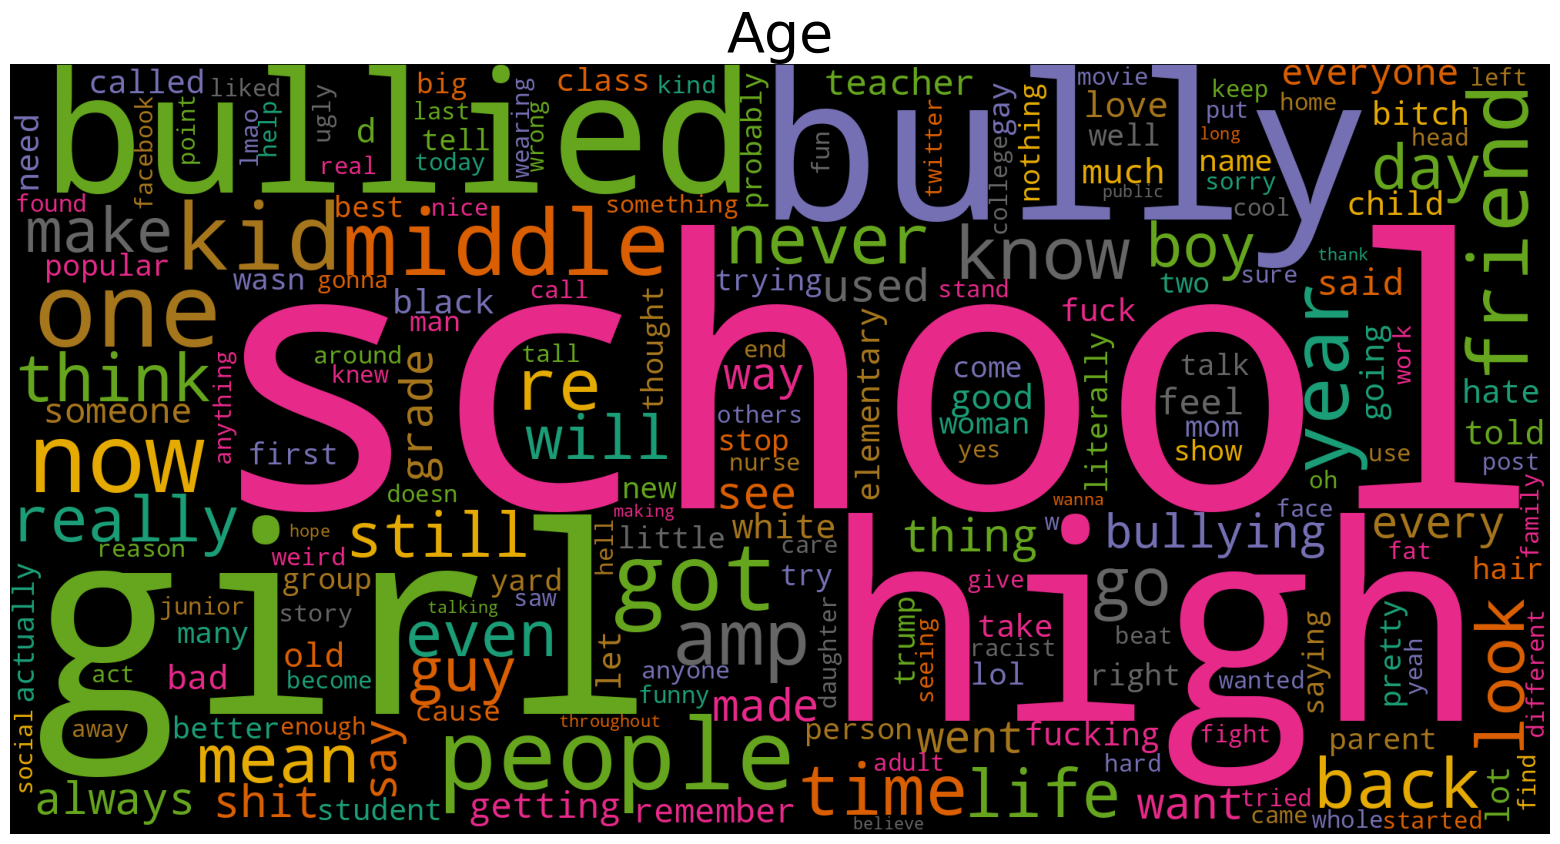

In [16]:
plt.figure(figsize=(20,10))
subset3 = df[df['cyberbullying_type']=='age']
text_age = subset3.tweet_text.values
cloud3=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud3)

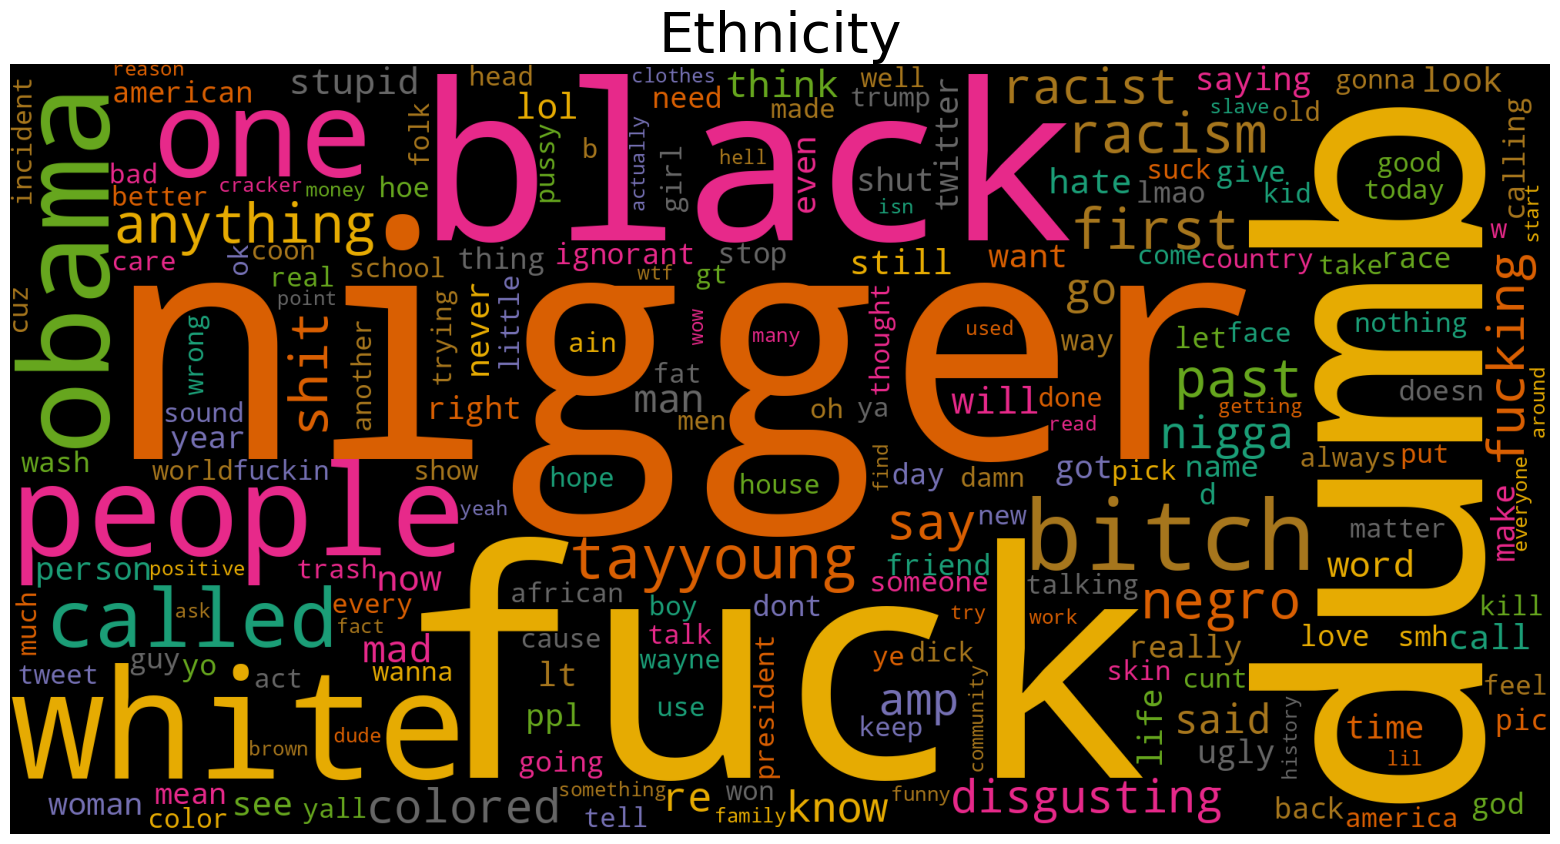

In [17]:
plt.figure(figsize=(20,10))
subset4 = df[df['cyberbullying_type']=='ethnicity']
text_ethnicity = subset4.tweet_text.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud4)

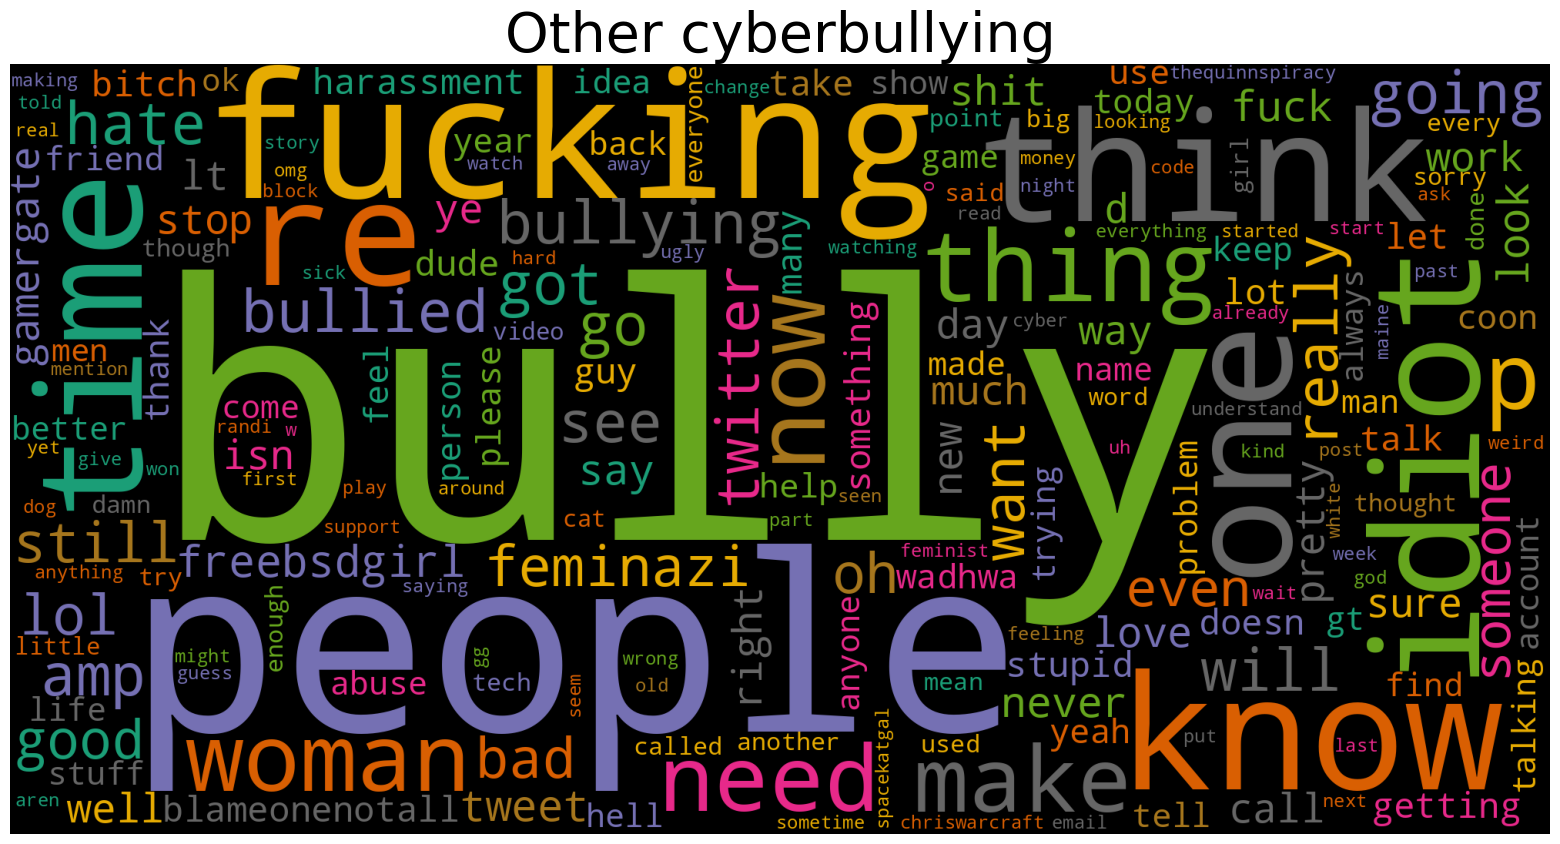

In [18]:
plt.figure(figsize=(20,10))
subset5 = df[df['cyberbullying_type']=='other_cyberbullying']
text_other = subset5.tweet_text.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other))

plt.axis('off')
plt.title("Other cyberbullying",fontsize=40)
plt.imshow(cloud5)

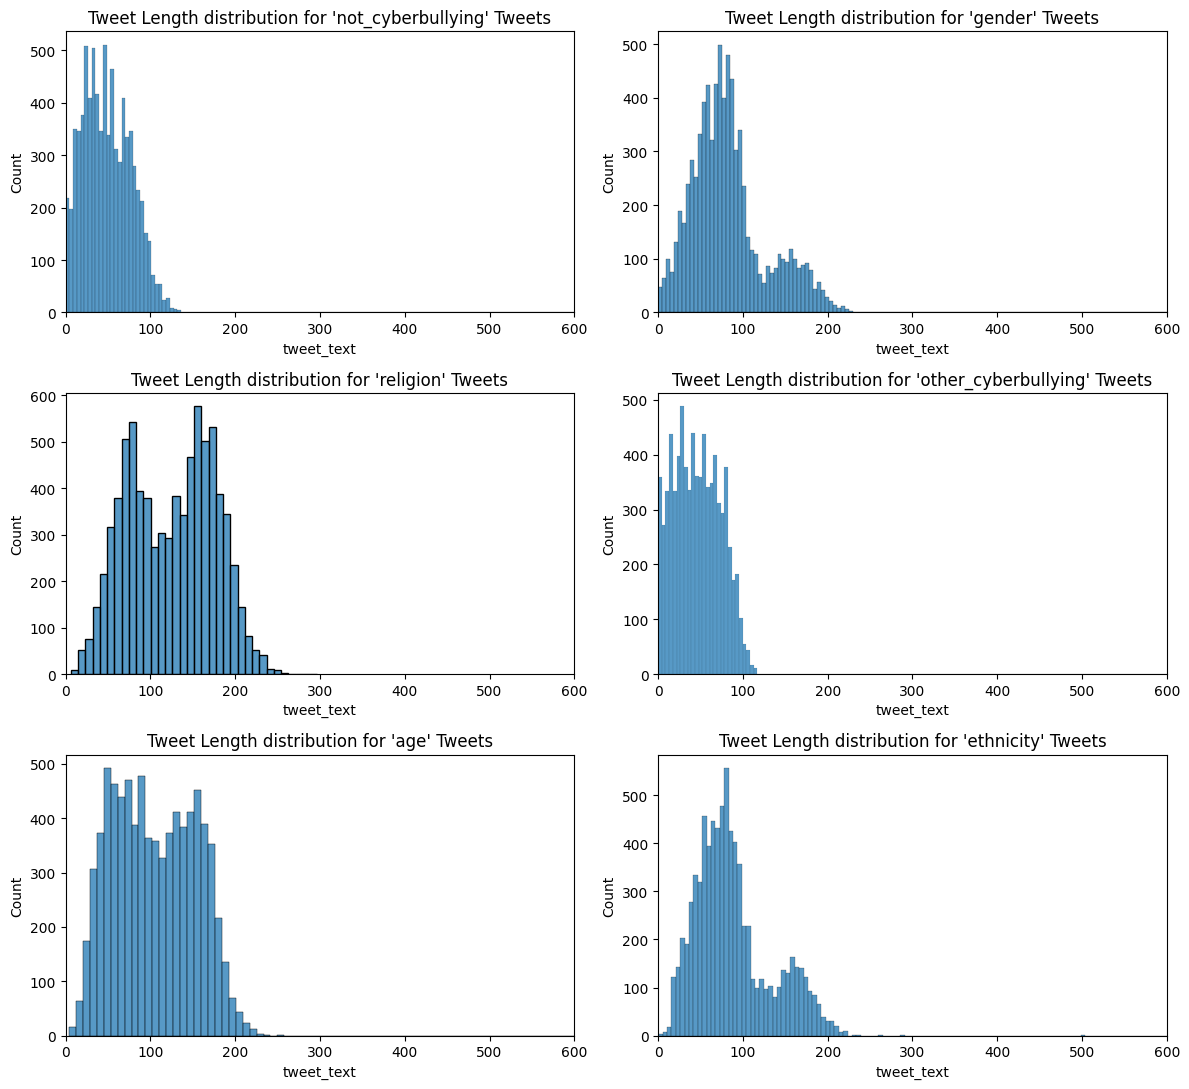

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 11))
k=0
for i in range(3):
    for j in range(2):
        cat = all_labels[k]
        tweet_len = df[df['cyberbullying_type']==cat]['tweet_text'].apply(lambda x:len(x) ) 
        sns.histplot(tweet_len, ax=ax[i,j]);
        ax[i,j].set_title("Tweet Length distribution for '{}' Tweets".format(cat));
        ax[i,j].set_xlim(0,600);
        #sns.histplot(tweet_1_len, ax=ax[1]);
        #ax[i,j].set_title("Tweet Length distribution for Disaster Tweets");
        plt.tight_layout();
        k+=1

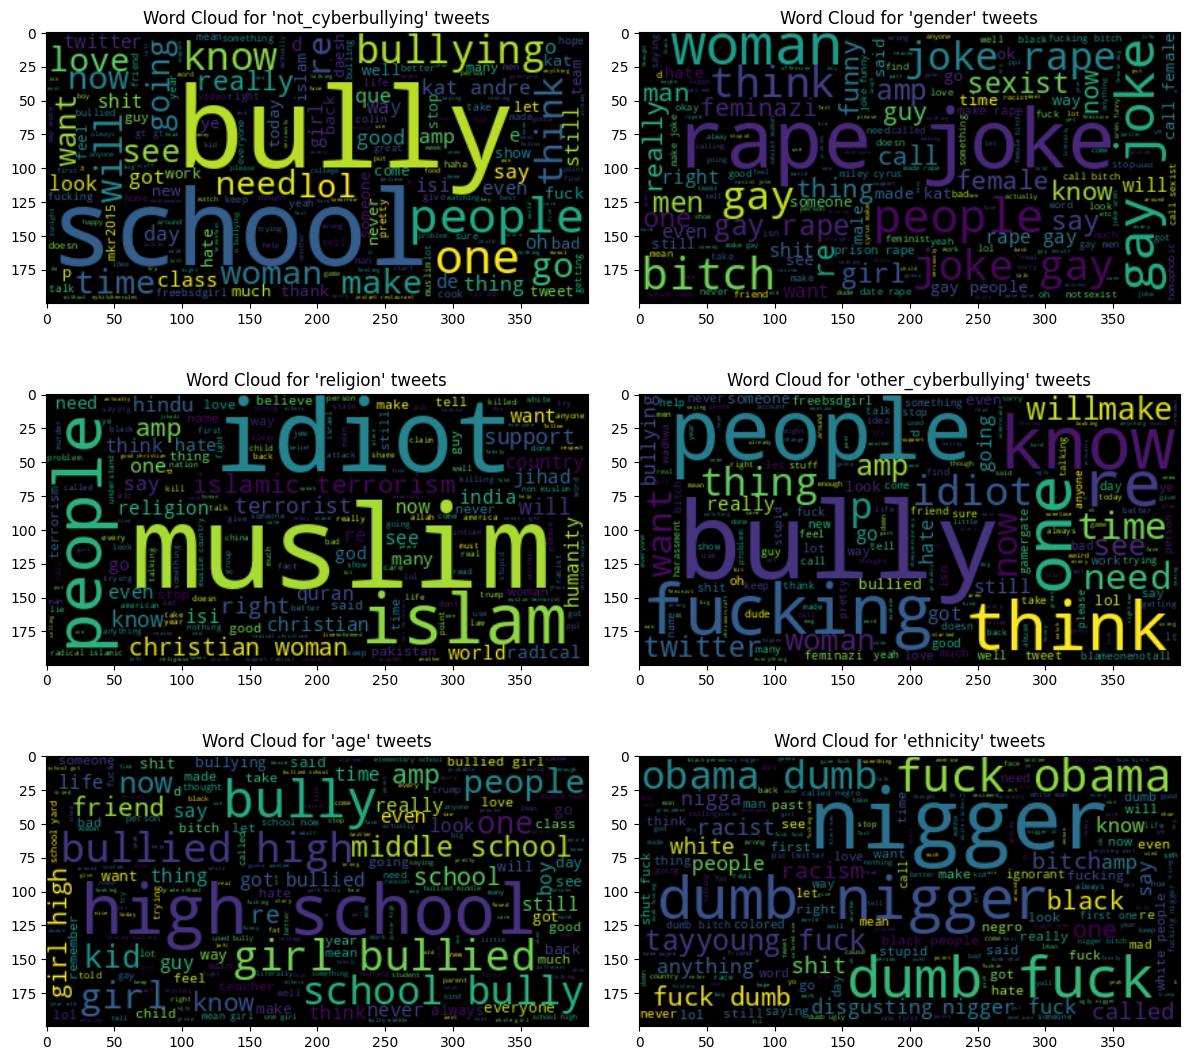

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 11))
k=0
for i in range(3):
    for j in range(2):
        cat = all_labels[k]
        #tweet_punct = get_wrd_count(data_df[data_df['cyberbullying_type']==cat]['tweet_text'].tolist())
        #tweet0_punct_cnt_sorted = tweet_punct.most_common()[1:]
        #l0, h0, = [],[]
        #_ = [(l0.append(i[0]), h0.append(i[1])) for i in tweet0_punct_cnt_sorted]
        wordcloud = WordCloud().generate(" ".join(df[df['cyberbullying_type']==cat]['tweet_text'].tolist()))

        # Display the generated image:
        ax[i,j].imshow(wordcloud, interpolation='bilinear');
        #sns.barplot(x=list(range(len(l0))), y=h0, ax=ax[i,j]);
        #ax[i,j].set_ylim(top=21000);
        #ax[i,j].set_xticks(ticks = list(range(len(l0))), labels=l0);
        #ax[i,j].set_xlabel('Words');
        #ax[i,j].set_ylabel('Count');
        #ax[i,j].set_title("Word Count for '{}' tweets".format(cat));
        ax[i,j].set_title("Word Cloud for '{}' tweets".format(cat));
        k+=1
fig.tight_layout();